### Author: Olufemi Victor Tolulope

# INTRO.

This Notebook details my solution for the [GeoAI Challege Location Mention Recognition from Social Media by ITU](https://zindi.africa/competitions/geoai-challege-location-mention-recognition-from-social-media) Challenge. The goal of this challenge is to encourage the development of systems for Location Mention Recognition (LMR) from microblogging posts during emergencies. These automatic systems are anticipated to support the relief activities that are executed by the response authorities during disasters.

# The Data
* The Dataset used is the official IDRISI dataset available on the Github Repository here: https://github.com/rsuwaileh/IDRISI/tree/main/LMR

We were also provided a sample submission by Zindi which was downloaded from the Data Tab where the competition was hosted

# Setup & Extra Info

* Kaggle Kernnels
* Nvidia Tesla P100
* Notebook Runtime: 3 minutes 23 Seconds

### Acknowledgements.

Winning this competiton wouldn't have been possible without leveraging the awesome work of **Dr Reem Suwaileh (PhD)** and learning from her ground breaking work on LMR. The Affilated resources leveraged are:

* Annotation Guidelines PDF - Available in Dr Reem's Github Repo & Dataset
* Time-Critical Geolocation for Social Good - Dr Reem's Conference Paper
* Model Baselines - Available & Open Source on Dr Reem's HuggingFace Account

In [1]:
!git clone "https://github.com/rsuwaileh/IDRISI.git" # Clone the Dataset on the Github repository

Cloning into 'IDRISI'...
remote: Enumerating objects: 1303, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 1303 (delta 67), reused 160 (delta 51), pack-reused 1093
Receiving objects: 100% (1303/1303), 28.50 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (411/411), done.
Updating files: 100% (294/294), done.


In [2]:
!pip install transformers -qq # Install Transformers

In [3]:
# Import the libraries needed

import os
import pandas as pd
import tqdm
import warnings
warnings.filterwarnings("ignore")

###### Create the Dataset by combining the Data from Individual folders

In [4]:
directories = os.listdir("IDRISI/LMR/data/EN/gold-random-json")
directories

['hurricane_matthew_2016',
 'kaikoura_earthquake_2016',
 'hurricane_dorian_2019',
 'greece_wildfires_2018',
 'cyclone_idai_2019',
 'kerala_floods_2018',
 'california_wildfires_2018',
 'srilanka_floods_2017',
 'hurricane_irma_2017',
 'hurricane_maria_2017',
 'puebla_mexico_earthquake_2017',
 'ecuador_earthquake_2016',
 'pakistan_earthquake_2019',
 'hurricane_florence_2018',
 'canada_wildfires_2016',
 'maryland_floods_2018',
 'midwestern_us_floods_2019',
 'italy_earthquake_aug_2016',
 'hurricane_harvey_2017']

In [5]:
path = "IDRISI/LMR/data/EN/gold-random-json/"

In [6]:
train_df = pd.DataFrame()
test_df = pd.DataFrame()
valid_df = pd.DataFrame()

In [7]:
for i in tqdm.tqdm(directories):
  cur_path = path+i
  train = pd.read_json(cur_path + "/train.jsonl", lines=True)
  test = pd.read_json(cur_path + "/test_unlabeled.jsonl", lines=True)
  valid = pd.read_json(cur_path + "/dev.jsonl", lines=True)
  train_df = pd.concat([train_df,train])
  test_df = pd.concat([test_df,test])
  valid_df = pd.concat([valid_df,valid])

100%|██████████| 19/19 [00:04<00:00,  4.73it/s]


In [8]:
pd.read_json(cur_path + "/test_unlabeled.jsonl", lines=True)

,tweet_id,user_id,text,created_at,humAID_class
0,903597712251248640,869724130903564288,Harvey Live Updates: Death Toll Rises in Texas...,2017-09-01 12:37:37+00:00,injured_or_dead_people
1,902648150166568960,45684134,"Quiet at Delco, Austin #Harvey evacuee shelter...",2017-08-29 21:44:24+00:00,displaced_people_and_evacuations
2,903644050150051840,2468244019,If there are any models affected by #Hurricane...,2017-09-01 15:41:45+00:00,rescue_volunteering_or_donation_effort
3,903435368481136640,3718403057,#Nationals Max Scherzer paying all adoption fe...,2017-09-01 01:52:31+00:00,displaced_people_and_evacuations
4,903646875437461504,45725942,We learned from #ColoradoFlood #Harvey survivo...,2017-09-01 15:52:58+00:00,requests_or_urgent_needs
...,...,...,...,...,...
254,902720844866211840,835855365526994944,#NeedWaterRescue #HarveyRescue #CajunNavy #Har...,2017-08-30 02:33:15+00:00,rescue_volunteering_or_donation_effort
255,902593911088185344,2801686349,"In some areas, we are proactively taking servi...",2017-08-29 18:08:52+00:00,infrastructure_and_utility_damage
256,902643921016295424,111704438,GIVE NOW to provide families devastated by #Hu...,2017-08-29 21:27:35+00:00,rescue_volunteering_or_donation_effort
257,903613486537826304,21432912,SUPPORT AREA FOOD BANKS! @HoustonFoodBank @saf...,2017-09-01 13:40:18+00:00,rescue_volunteering_or_donation_effort


###### Preview Test Data

In [9]:
test_df

,tweet_id,user_id,text,created_at,humAID_class
0,783930991387762688,341678317,@shl Hurricane left Haiti. If YOU care donate ...,2016-10-06 07:24:47+00:00,rescue_volunteering_or_donation_effort
1,784697434656034816,29686692,"RT @RT_com: Over 870 killed, 350,000 in need o...",2016-10-08 10:10:22+00:00,injured_or_dead_people
2,783884906833121280,2786381160,Im raising money for Hurricane Relief fund for...,2016-10-06 04:21:40+00:00,rescue_volunteering_or_donation_effort
3,783827456713121792,2795524054,#BreakingNews Hurricane Matthew kills 26 in Ca...,2016-10-06 00:33:23+00:00,injured_or_dead_people
4,783831315149881344,2755264697,In response to Hurricane Matthew and its devas...,2016-10-06 00:48:43+00:00,rescue_volunteering_or_donation_effort
...,...,...,...,...,...
254,902720844866211840,835855365526994944,#NeedWaterRescue #HarveyRescue #CajunNavy #Har...,2017-08-30 02:33:15+00:00,rescue_volunteering_or_donation_effort
255,902593911088185344,2801686349,"In some areas, we are proactively taking servi...",2017-08-29 18:08:52+00:00,infrastructure_and_utility_damage
256,902643921016295424,111704438,GIVE NOW to provide families devastated by #Hu...,2017-08-29 21:27:35+00:00,rescue_volunteering_or_donation_effort
257,903613486537826304,21432912,SUPPORT AREA FOOD BANKS! @HoustonFoodBank @saf...,2017-09-01 13:40:18+00:00,rescue_volunteering_or_donation_effort


###### Preview Validation Data

In [10]:
valid_df = valid_df.reset_index(drop=True)
valid_df

,tweet_id,user_id,text,created_at,humAID_class,location_mentions
0,783610962645553152,18456335,TOP STORY: South Carolina begins evacuation of...,2016-10-05 10:13:06+00:00,displaced_people_and_evacuations,"[{'text': 'South Carolina', 'type': 'State', '..."
1,783803775702011904,1161665851,RatedBama just posted Haiti Costal Town Destro...,2016-10-05 22:59:17+00:00,infrastructure_and_utility_damage,"[{'text': 'Haiti', 'type': 'Country', 'start_o..."
2,783873541871693824,367910041,#TheCoeReport: At Least 4 Killed As Hurricane ...,2016-10-06 03:36:30+00:00,injured_or_dead_people,"[{'text': 'Haiti', 'type': 'Island', 'start_of..."
3,784649193872842752,1933130743,RT @eNCA: eNCA | UPDATE: Hurricane Matthew kil...,2016-10-08 06:58:40+00:00,injured_or_dead_people,"[{'text': 'Haiti', 'type': 'Country', 'start_o..."
4,783750547564355584,16031927,Hurricane Matthew Leaves Catastrophic Devastat...,2016-10-05 19:27:46+00:00,injured_or_dead_people,"[{'text': 'Haiti', 'type': 'Country', 'start_o..."
...,...,...,...,...,...,...
2051,903374296428535808,98514862,.@uiltexas announces waiver process for studen...,2017-08-31 21:49:50+00:00,displaced_people_and_evacuations,[]
2052,902724913865379840,902704854921076736,@JoelOsteen help our cause please #HopeForHous...,2017-08-30 02:49:25+00:00,requests_or_urgent_needs,[]
2053,902917702494420992,2787131373,Dangerous flooding! Friend posted this pic of ...,2017-08-30 15:35:30+00:00,infrastructure_and_utility_damage,"[{'text': 'Beaumont', 'type': 'City/town', 'st..."
2054,902653388365680640,3237333328,Remember to text HARVEY to 90999 to donate $10...,2017-08-29 22:05:12+00:00,rescue_volunteering_or_donation_effort,[]


We can safely discard other columns and focus on the task at hand

In [11]:
train_df = train_df.reset_index(drop=True)[["tweet_id","text","location_mentions"]]
test_df = test_df.reset_index(drop=True)[["tweet_id","text"]]
valid_df = valid_df.reset_index(drop=True)[["tweet_id","text","location_mentions"]]

###### Preview Train Dataframe

In [12]:
train_df

,tweet_id,text,location_mentions
0,784649154194710528,"Flash Flood Warning for Bamberg, Calhoun, Clar...","[{'text': 'Bamberg', 'type': 'City/town', 'sta..."
1,783773548292743168,We Were Already In A Cholera Crisis; Hurricane...,"[{'text': 'Haiti', 'type': 'Country', 'start_o..."
2,783690110051098624,#HurricaneMatthew moves into #Bahamas after ba...,"[{'text': 'Bahamas', 'type': 'Island', 'start_..."
3,783642745000910848,RT @robynpike: .@TeamBrokenEarth is accepting ...,"[{'text': 'Haiti', 'type': 'Country', 'start_o..."
4,783447364564574208,To make a donation to Heart of God Haitis Hurr...,"[{'text': 'Haitis', 'type': 'Country', 'start_..."
...,...,...,...
14387,901745837281349632,"RT @TexasTribune: Stay safe, Houston. Watch @K...","[{'text': 'Houston', 'type': 'City/town', 'sta..."
14388,903622085116907520,RESPONDING TO HURRICANE HARVEY First Congregat...,"[{'text': 'First Congregational Church', 'type..."
14389,902841464710766592,Don’t drive through flooded areas & standing w...,[]
14390,903398455204294656,"HFD has answered 800 calls since midnight, 22 ...",[]


In [13]:
ss = pd.read_csv("/kaggle/input/location-mention-sample-submission/SampleSubmission.csv")

###### Inference on test set

Here we leverage on Dr Reem's Model from the HuggingFace Hub, the model has already been pretrained to detect location from text with most models having a whopping score(F1) of 0.97+ This is good enough and we can use it for inference and focus on Post Processing

Use Transformers high level pipeline

In [14]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("token-classification", model="rsuwaileh/IDRISI-LMR-EN-timebased-typeless", device=0)

#rsuwaileh/IDRISI-LMR-EN-timebased-typeless
#rsuwaileh/IDRISI-LMR-EN-random-typebased

Some weights of the model checkpoint at rsuwaileh/IDRISI-LMR-EN-timebased-typeless were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


###### Creating Helpers

In the subsequent cells we create helper functions that perform very simple tasks but ultimately useful for processing the Predictions from the model

###### Helper Function 1: Remove Punctuations Except Hyphen.

This simple function removes all punctuations from a word except if it's hyphen

In [15]:
import string

def remove_punctuation_except_hyphen(word):
    # Define a set of punctuation characters to exclude from removal
    allowed_punctuations = set('-')
    
    # Create a translation table to remove all other punctuations
    translator = str.maketrans('', '', string.punctuation)
    
    # Apply the translation table to the word, but keep the hyphens
    cleaned_word = word.translate(translator)
    
    return cleaned_word

###### Helper Function 2: Mentions Destroyer

On checking the annotation manual, you'll find that the annotation style used does not count Twitter User mentions in tweets as a location. The Mentions Destroyer simply Destroys it and Replaces the entire Mention with **?**

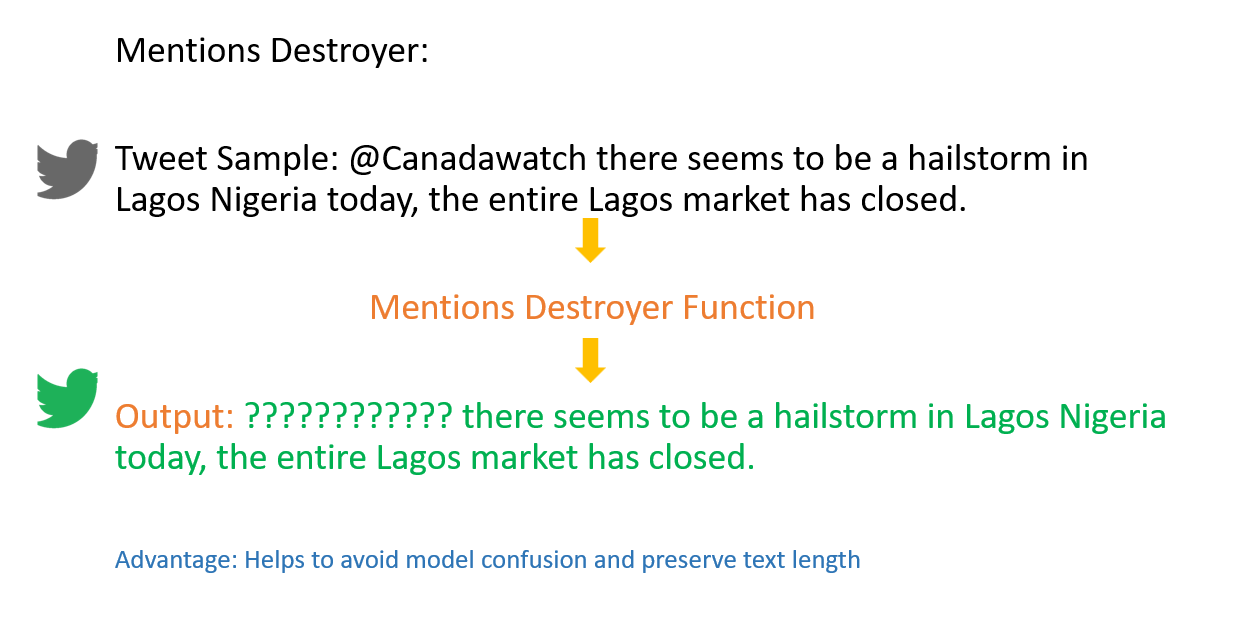

In [16]:
import re
def mentions_destroyer(text):
    hashtags = re.findall(r'@\w+', text)
    for hashtag in hashtags:
        text = text.replace(hashtag,"?"*len(hashtag))
    return(text)

###### Helper Function 3: Fix Entity

The Fix Entity Function helps to fix preddictions from the model, sometimes model predictions are broken into tokens as the model itself if primarily built for token classification, and hence misses out complete words hence returning wrong Start and End times.

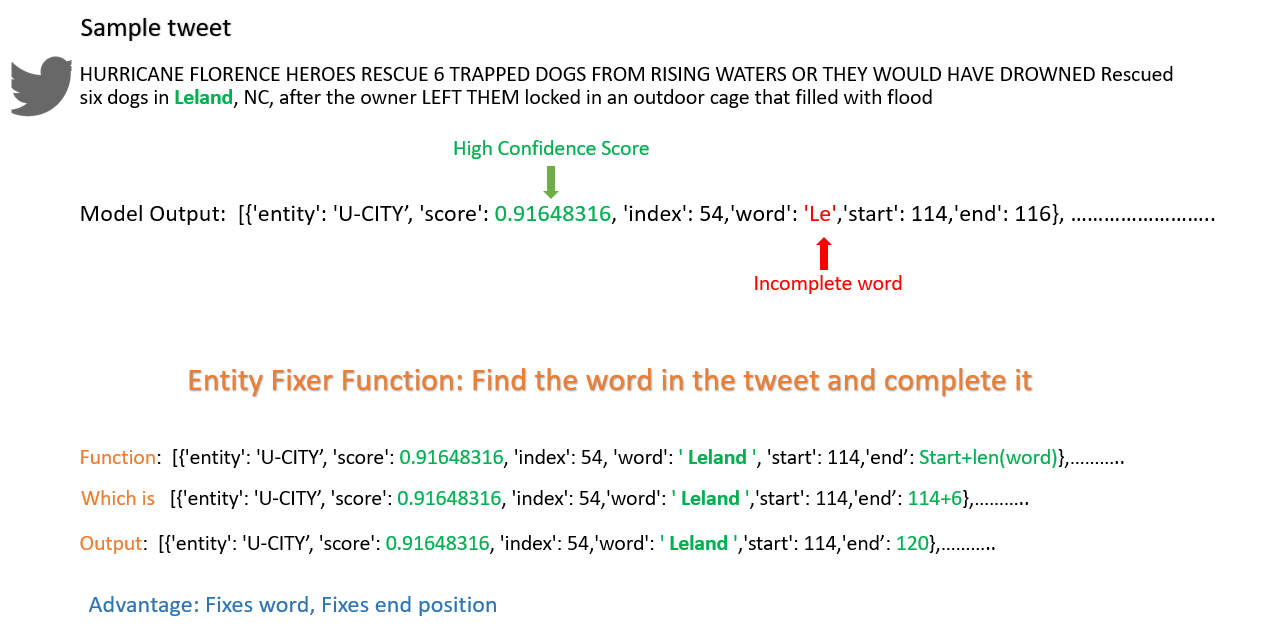

In [17]:
def fix_entity(entity_list, corresponding_sentence):
    fixed_entity = []
    for entity in entity_list:
        if entity['score']> 0.5:
            if len(entity['word']) in [1,2,3,4]:
                if entity['word'] in string.punctuation:
                    entity['end'] = entity['start']+1
                    fixed_entity.append(entity)
                else:
                    entity['word'] = remove_punctuation_except_hyphen(corresponding_sentence[entity['start']:].split()[0])
                    entity['end'] = entity['start']+len(entity['word'])
                    fixed_entity.append(entity)
            else:
                fixed_entity.append(entity)
        else:
            fixed_entity.append(entity)
    return(fixed_entity)

###### Helper Function 4: Post Process Predictions

This function helps track how close the values in a list are. Given two lists that contain start and end positions. If the values of an end position is too close to a start position, i.e the minimum threshold is (1) it chops it off and assumes the end value is the next one. See Diagram or read code for clear understanding.

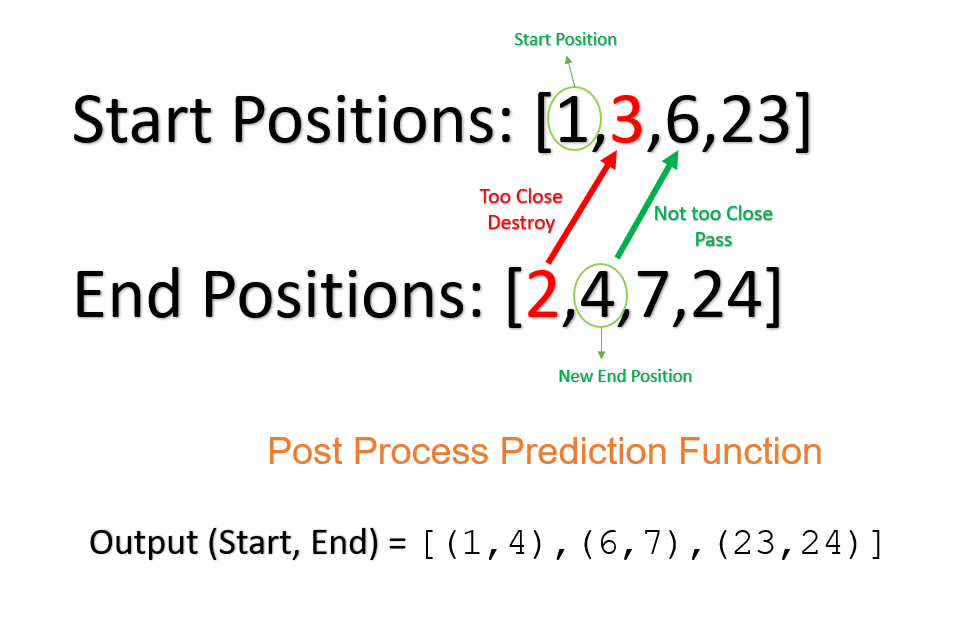

In [18]:
def post_process_predictions(token_start_positions, token_end_positions):
    corrected_entities = []
    current_start = None
    current_end = None

    for start, end in zip(token_start_positions, token_end_positions):
        if current_start is None:
            current_start = start
            current_end = end
        elif start - current_end > 1:
            # Detected a gap, so the previous entity ends and a new one starts
            corrected_entities.append((current_start, current_end))
            current_start = start
            current_end = end
        else:
            current_end = end

    # Append the last entity
    if current_start is not None:
        corrected_entities.append((current_start, current_end))

    return corrected_entities

In [19]:
post_process_predictions([1,3,6,23], [2,4,7,24])

[(1, 4), (6, 7), (23, 24)]

###### Implication of this function on Tweets

Although, this function is not directly applied on tweets, the pictorial implication is shown below.

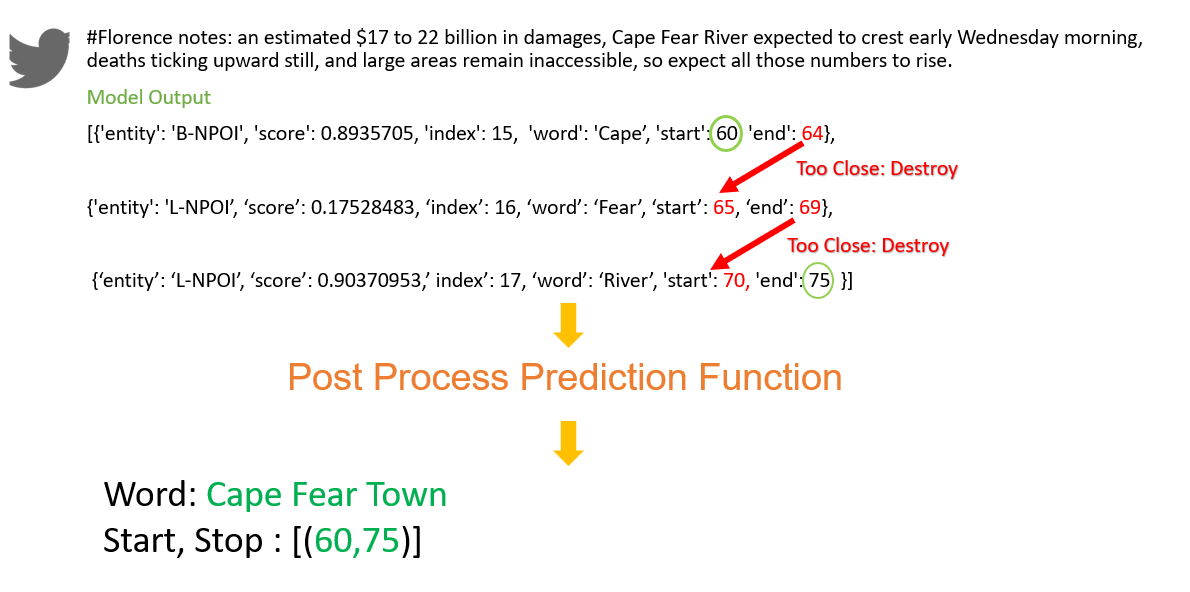

###### Performing Inference

This inference function basically combines the use of the 4 functions as outlined above. however there are still some extra tricks employed to smoothen out the labels and help the helper functions achieve better results.

* Counting the number of #s in the predicted tokens to stabilize the proposed start location of the word.
* The submission style also assumes we have maximum of 17 predictions, we handle all this in the function as well.

In [20]:
def inference_me(text,text_id):
  all_predictions = []
  all_ids = []
  all_words = []
  x = pipe(mentions_destroyer(text))
  x = fix_entity(x,text)

  starts = []
  ends = []
  pg = []


  preds  = []
  for i in range(len(x)):
    starts.append(x[i]["start"])
    ends.append(x[i]["end"])
    pg.append(x[i]["word"].count("#"))
  starts = [a - b for a, b in zip(starts, pg)]
  preds = post_process_predictions(starts,ends)
  for n,i in enumerate(preds[:17]):
    all_ids.append("ID_"+str(text_id)+f"_loc{n+1}"+"_start")
    all_predictions.append(i[0])
    all_ids.append("ID_"+str(text_id)+f"_loc{n+1}"+"_end")
    all_predictions.append(i[1])
    all_words.append(text[i[0]:i[1]])
    all_words.append(text[i[0]:i[1]])

  if len(preds)<17:
    for n in range(len(preds)+1, 18):
      all_ids.append("ID_"+str(text_id)+f"_loc{n}"+"_start")
      all_predictions.append(0)
      all_ids.append("ID_"+str(text_id)+f"_loc{n}"+"_end")
      all_predictions.append(0)
      all_words.append("")
      all_words.append("")
    
  return(all_ids, all_predictions, all_words)

###### Prepare submission Format

In [21]:
ss["loc_number"] = [int(i.split("_")[2][3:]) for i in ss["Tweet_ID"]]
ss["start_or_stop"] = [i.split("_")[3] for i in ss["Tweet_ID"]]
ss["start_or_stop_num"] = [0 if i=="start" else 1 for i in ss["start_or_stop"]]

In [22]:
ss["tweet_id"] = [int(i.split("_")[1]) for i in ss.Tweet_ID]
ss = ss.sort_values(by=['tweet_id',"loc_number", "start_or_stop_num"]).reset_index(drop=True)
ss

,Tweet_ID,Index,loc_number,start_or_stop,start_or_stop_num,tweet_id
0,ID_721565577505030144_loc1_start,0,1,start,0,721565577505030144
1,ID_721565577505030144_loc1_end,0,1,end,1,721565577505030144
2,ID_721565577505030144_loc2_start,0,2,start,0,721565577505030144
3,ID_721565577505030144_loc2_end,0,2,end,1,721565577505030144
4,ID_721565577505030144_loc3_start,0,3,start,0,721565577505030144
...,...,...,...,...,...,...
138239,ID_1177156754829926400_loc15_end,0,15,end,1,1177156754829926400
138240,ID_1177156754829926400_loc16_start,0,16,start,0,1177156754829926400
138241,ID_1177156754829926400_loc16_end,0,16,end,1,1177156754829926400
138242,ID_1177156754829926400_loc17_start,0,17,start,0,1177156754829926400


In [23]:
test_df = test_df.sort_values(by='tweet_id').reset_index(drop=True)
test_df

,tweet_id,text
0,721565577505030144,RT @YourAnonCentral: Since #Ecuador earthquake...
1,721565833814786048,RT @AP: Im in a state of panic. -Quito residen...
2,721567194199379968,7.8 earthquake in Ecuador: Tsunami warning iss...
3,721575488234340352,"RT @NewEarthquake: 7.4 earthquake, 14km NNW of..."
4,721580577590104064,Powerful earthquake hits Ecuador; at least 41 ...
...,...,...
4061,1177137369562193920,Today a Free-Medical Camp was organized by Pak...
4062,1177141832431652864,Four people have died after a strong #earthqua...
4063,1177146978431422464,"Five killed, others injured in Iran train acci..."
4064,1177153282323755008,Families have lost their homes and everything ...


###### Do inteference on the test set

In [24]:
final_ids = []
final_preds = []
final_words = []
n=0

for i in zip(test_df.tweet_id, test_df.text):
  n = n+1
  text_id,text = i
  id_set, pred_set, words_set = inference_me(text,text_id)
  final_ids = final_ids+id_set
  final_preds = final_preds+ pred_set
  final_words = final_words + words_set
  if n%500 == 0:
    print(n)

500
1000
1500
2000
2500
3000
3500
4000


In [25]:
sub = pd.DataFrame()
sub["Tweet_ID"] = ss.Tweet_ID
sub["Index"] = final_preds
#sub["Words"] = final_words
sub

,Tweet_ID,Index
0,ID_721565577505030144_loc1_start,28
1,ID_721565577505030144_loc1_end,35
2,ID_721565577505030144_loc2_start,0
3,ID_721565577505030144_loc2_end,0
4,ID_721565577505030144_loc3_start,0
...,...,...
138239,ID_1177156754829926400_loc15_end,0
138240,ID_1177156754829926400_loc16_start,0
138241,ID_1177156754829926400_loc16_end,0
138242,ID_1177156754829926400_loc17_start,0


In [26]:
sub = sub.reset_index(drop=True)

In [27]:
sub.Tweet_ID.nunique()

119136

In [28]:
name = "model1.csv"
sub.to_csv(name, index=False)

### Local Validation - Extras

These code cells below allows you to do local validation of the post processing strategies instead of validating with the Leaderboard

In [29]:
valid_df

,tweet_id,text,location_mentions
0,783610962645553152,TOP STORY: South Carolina begins evacuation of...,"[{'text': 'South Carolina', 'type': 'State', '..."
1,783803775702011904,RatedBama just posted Haiti Costal Town Destro...,"[{'text': 'Haiti', 'type': 'Country', 'start_o..."
2,783873541871693824,#TheCoeReport: At Least 4 Killed As Hurricane ...,"[{'text': 'Haiti', 'type': 'Island', 'start_of..."
3,784649193872842752,RT @eNCA: eNCA | UPDATE: Hurricane Matthew kil...,"[{'text': 'Haiti', 'type': 'Country', 'start_o..."
4,783750547564355584,Hurricane Matthew Leaves Catastrophic Devastat...,"[{'text': 'Haiti', 'type': 'Country', 'start_o..."
...,...,...,...
2051,903374296428535808,.@uiltexas announces waiver process for studen...,[]
2052,902724913865379840,@JoelOsteen help our cause please #HopeForHous...,[]
2053,902917702494420992,Dangerous flooding! Friend posted this pic of ...,"[{'text': 'Beaumont', 'type': 'City/town', 'st..."
2054,902653388365680640,Remember to text HARVEY to 90999 to donate $10...,[]


In [30]:
final_ids = []
final_preds = []
final_words = []
n=0

for i in zip(valid_df.tweet_id, valid_df.text):
  n = n+1
  text_id,text = i
  id_set, pred_set, words_set = inference_me(text,text_id)
  final_ids = final_ids+id_set
  final_preds = final_preds+ pred_set
  final_words = final_words + words_set
  if n%500 == 0:
    print(n)

500
1000
1500
2000


In [31]:
valxx = pd.DataFrame()
valxx["Tweet_ID"] = final_ids
valxx["Index"] = final_preds
#sub["Words"] = final_words
valxx

,Tweet_ID,Index
0,ID_783610962645553152_loc1_start,11
1,ID_783610962645553152_loc1_end,25
2,ID_783610962645553152_loc2_start,99
3,ID_783610962645553152_loc2_end,104
4,ID_783610962645553152_loc3_start,107
...,...,...
69899,ID_902750773817331712_loc15_end,0
69900,ID_902750773817331712_loc16_start,0
69901,ID_902750773817331712_loc16_end,0
69902,ID_902750773817331712_loc17_start,0


In [32]:
def validate(x, text):
  all_predictions = []
  all_ids = []
  all_words = []
  starts = []
  ends = []
  pg = []

  preds  = []
  for i in range(len(x)):
    starts.append(x[i]["start_offset"])
    ends.append(x[i]["end_offset"])
    pg.append(x[i]["text"].count("#"))
  preds = [(a,b) for a,b in zip(starts,ends)]
  for n,i in enumerate(preds):
    all_ids.append("ID_"+str(text_id)+f"_loc{n+1}"+"_start")
    all_predictions.append(i[0])
    all_ids.append("ID_"+str(text_id)+f"_loc{n+1}"+"_end")
    all_predictions.append(i[1])
    all_words.append(text[i[0]:i[1]])
    all_words.append(text[i[0]:i[1]])

  if len(preds)<17:
    for n in range(len(preds)+1, 18):
      all_ids.append("ID_"+str(text_id)+f"_loc{n}"+"_start")
      all_predictions.append(0)
      all_ids.append("ID_"+str(text_id)+f"_loc{n}"+"_end")
      all_predictions.append(0)
      all_words.append("")
      all_words.append("")
  return(all_ids, all_predictions, all_words)

In [33]:
final_ids = []
final_preds = []
final_words = []
n=0

for i in zip(valid_df.location_mentions, valid_df.text):
  n = n+1
  loc_men,text = i
  id_set, pred_set, words_set = validate(loc_men, text)
  final_ids = final_ids+id_set
  final_preds = final_preds+ pred_set
  final_words = final_words + words_set
  if n%500 == 0:
    print(n)

500
1000
1500
2000


In [34]:
valxx

,Tweet_ID,Index
0,ID_783610962645553152_loc1_start,11
1,ID_783610962645553152_loc1_end,25
2,ID_783610962645553152_loc2_start,99
3,ID_783610962645553152_loc2_end,104
4,ID_783610962645553152_loc3_start,107
...,...,...
69899,ID_902750773817331712_loc15_end,0
69900,ID_902750773817331712_loc16_start,0
69901,ID_902750773817331712_loc16_end,0
69902,ID_902750773817331712_loc17_start,0


In [35]:
valxx["Index2"] = final_preds

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(valxx["Index2"],valxx["Index"], squared=False)

11.991980373181544